# Object classification.

## In this examples, we will used pretrained models and keras. So not training will be performed at all. 

## This code should run fine in any computer with a decent CPU, no need for a GPU at all.

In [1]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input
from keras.applications.vgg16 import decode_predictions as vgg16_decode_predictions

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as vgg19_preprocess_input
from keras.applications.vgg19 import decode_predictions as vgg19_decode_predictions

from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input as resnet50_preprocess_input
from keras.applications.resnet50 import decode_predictions as resnet50_decode_predictions

import pandas as pd
from IPython.display import Image

import shutil
import requests


%matplotlib inline

Using TensorFlow backend.


### Now, time to get our model, in this case we will play with VGG16, later we will use other models. 

### Notice that we will need to get the weights from the internet... and that might take a bit. Fortunately we only have to do this once per model

In [2]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

model = VGG16(weights='imagenet', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

### Lets inspect our model a bit more...

In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

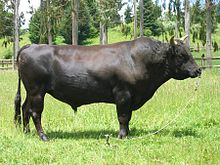

bison (76.79%)


In [4]:
image = load_img('bull.jpg', target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
display(Image(filename = "bull.jpg", width=IMAGE_HEIGHT, height=IMAGE_WIDTH))
image = img_to_array(image)
image = image.reshape((1, IMAGE_HEIGHT, IMAGE_WIDTH, 3))
image = vgg16_preprocess_input(image)
prediction = model.predict(image)
label = vgg16_decode_predictions(prediction)
label = label[0][0]

print('%s (%.2f%%)' % (label[1], label[2]*100))

In [5]:
predictions = pd.DataFrame(vgg16_decode_predictions(prediction)[0], columns=["_", "label", "prob"])
predictions = predictions.sort_values(by="prob")
predictions.set_index(predictions['label'], inplace=True)
del predictions["label"]
del predictions["_"]
predictions

prob
label                  
plow           0.000182
oxcart         0.000651
ox             0.065436
water_buffalo  0.165674
bison          0.767933

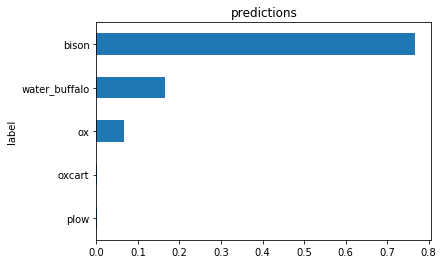

In [6]:
predictions.plot(kind='barh', title="predictions", legend=False)

### Lets put it all together...

In [7]:
def predict_image(image_file, concrete_model, preprocess_input, decode_predictions, show_chart=False):
    loaded_image = load_img(image_file, target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
    display(Image(filename = image_file, width=IMAGE_HEIGHT, height=IMAGE_WIDTH))
    loaded_image = img_to_array(loaded_image)
    loaded_image = loaded_image.reshape((1, IMAGE_HEIGHT, IMAGE_WIDTH, 3))
    loaded_image = preprocess_input(loaded_image)
    prediction = concrete_model.predict(loaded_image)
    label = decode_predictions(prediction)
    label = label[0][0]

    print('%s (%.2f%%)' % (label[1], label[2]*100))
    
    if show_chart:
        predictions = pd.DataFrame(decode_predictions(prediction)[0], columns=["_", "label", "prob"])
        predictions = predictions.sort_values(by="prob")
        predictions.set_index(predictions['label'], inplace=True)
        del predictions["label"]
        del predictions["_"]
        predictions
        predictions.plot(kind='barh', title="predictions", legend=False)
    

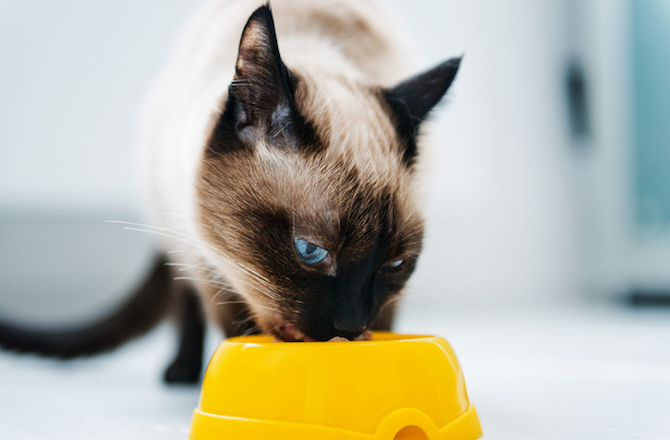

Siamese_cat (62.91%)


In [8]:
predict_image("cat.jpg", 
              model, 
              vgg16_preprocess_input, 
              vgg16_decode_predictions)

In [10]:
modelVGG19 = VGG19(weights='imagenet', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
modelVGG19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

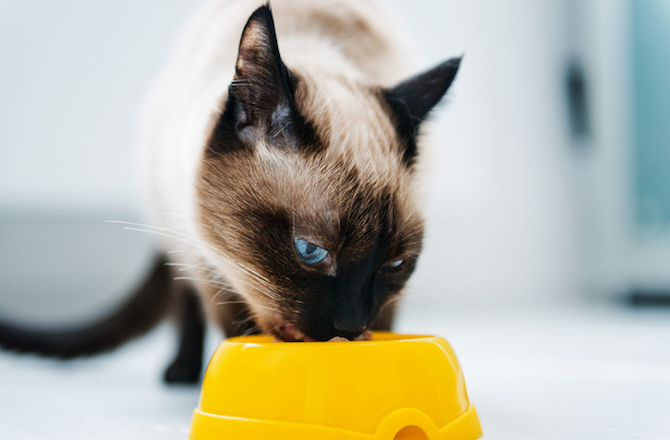

mousetrap (65.36%)


In [11]:
predict_image("cat.jpg", 
              modelVGG19, 
              vgg19_preprocess_input, 
              vgg19_decode_predictions)

In [12]:
modelResNet50 = ResNet50(weights='imagenet', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))

In [13]:
modelResNet50.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_4 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472        input_4[0][0]                    
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256         conv1[0][0]                      
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 112, 112, 64)  0           bn_conv1[0][0]                   
___________________________________________________________________________________________

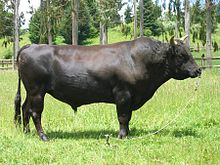

ox (59.55%)


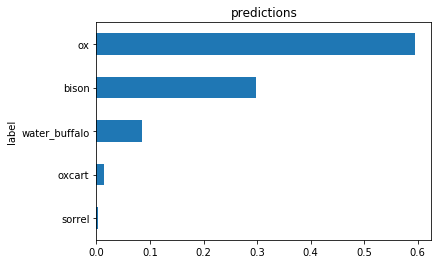

In [15]:

predict_image("bull.jpg", 
          modelResNet50, 
          resnet50_preprocess_input, 
          resnet50_decode_predictions, show_chart=True)

In [16]:
def download_image(url):
    try:
        final_name = url.split("/")[-1]
        response = requests.get(url, stream=True)
        with open(final_name, 'wb') as out_file:
            shutil.copyfileobj(response.raw, out_file)
        del response
    except:
        print("Bummer!! could not get url", url)
        return None
    else:
        return final_name


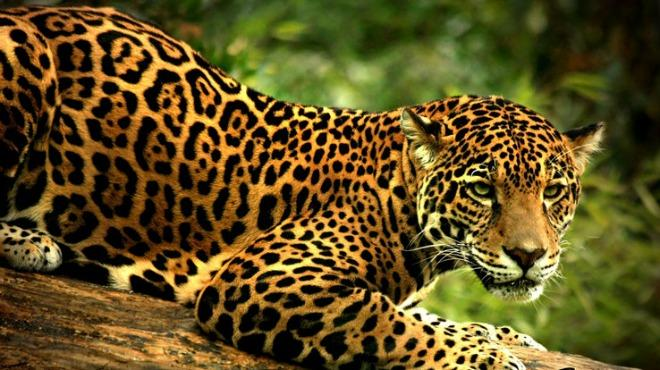

jaguar (96.21%)


In [17]:
predict_image(download_image("https://ecocolorstours-hz5sku48qafi72x5.netdna-ssl.com/wp-content/uploads/2015/09/jaguar2.jpg"),
             model,
              vgg16_preprocess_input, 
              vgg16_decode_predictions)

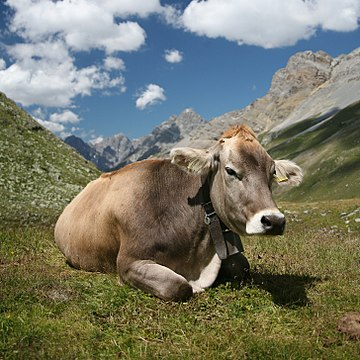

ram (27.80%)


In [18]:
my_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/CH_cow_2_cropped.jpg/360px-CH_cow_2_cropped.jpg"
predict_image(download_image(my_url),
             model,
              vgg16_preprocess_input, 
              vgg16_decode_predictions)



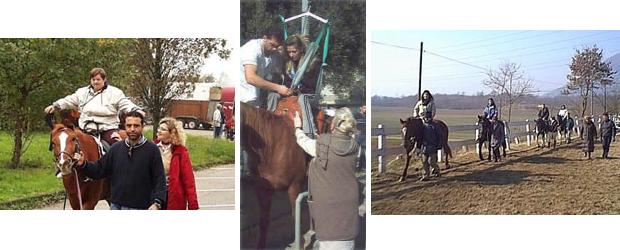

flagpole (14.22%)


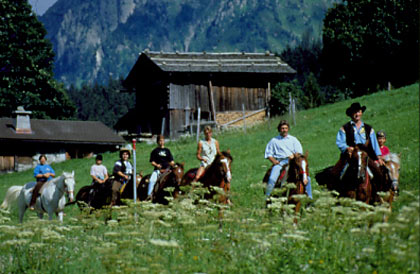

alp (86.40%)


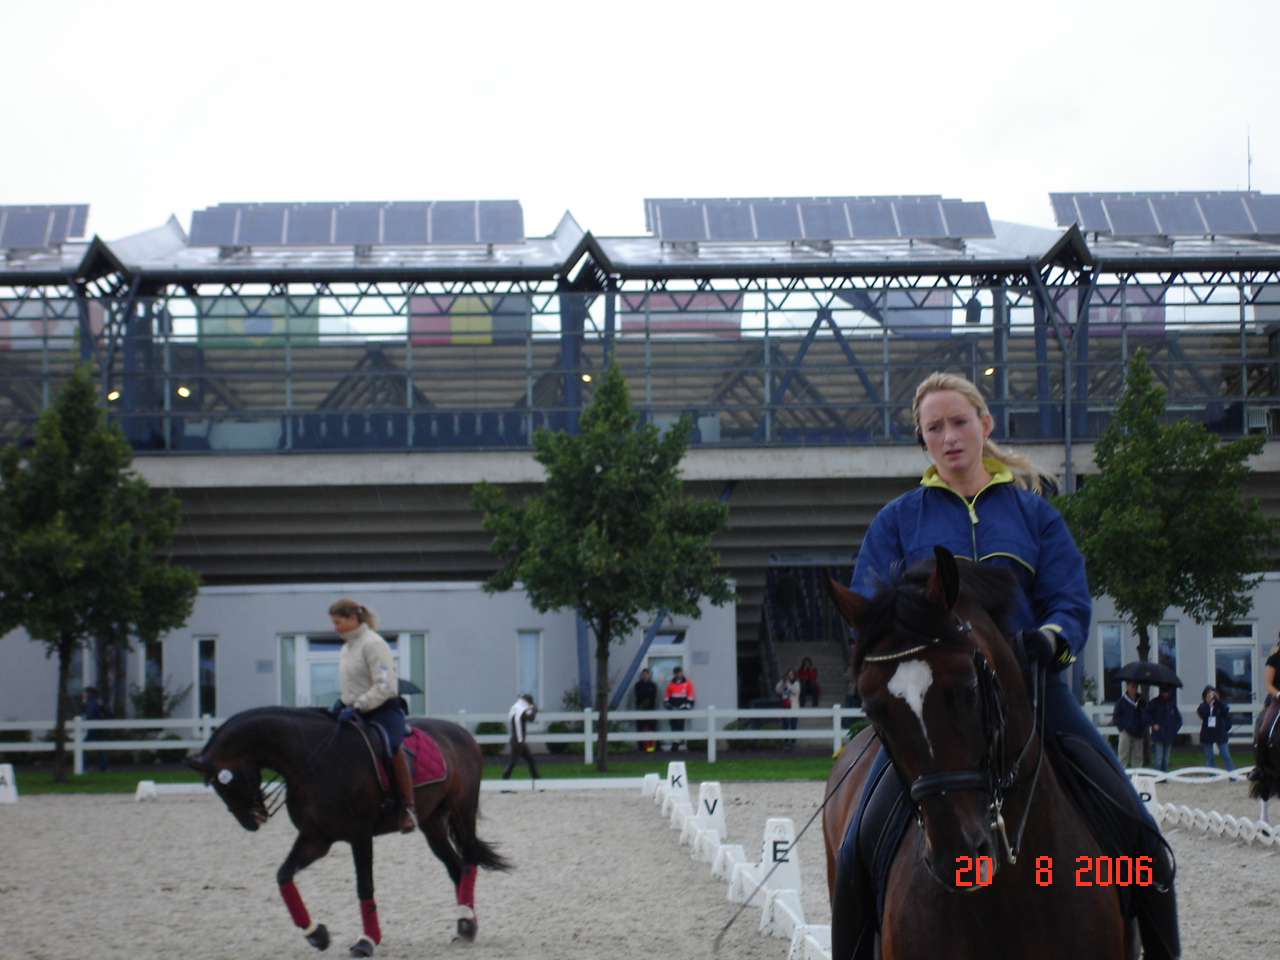

abaya (30.64%)


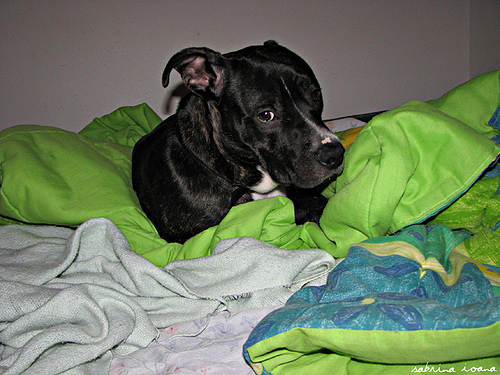

Staffordshire_bullterrier (54.37%)


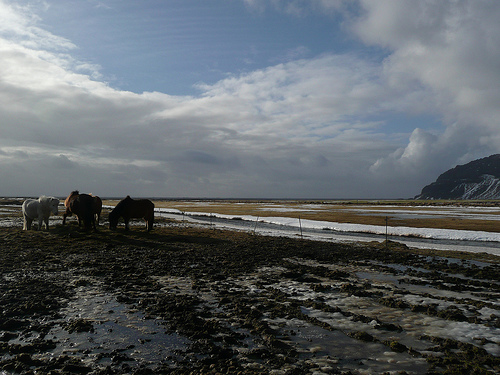

wreck (38.36%)


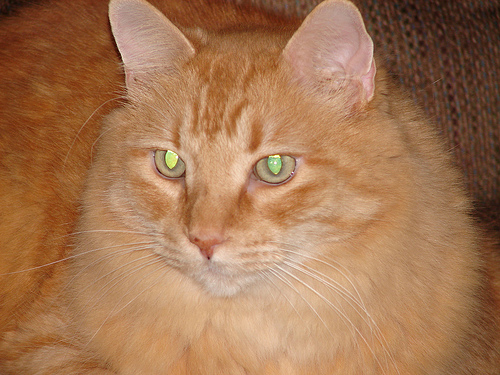

tiger_cat (33.81%)


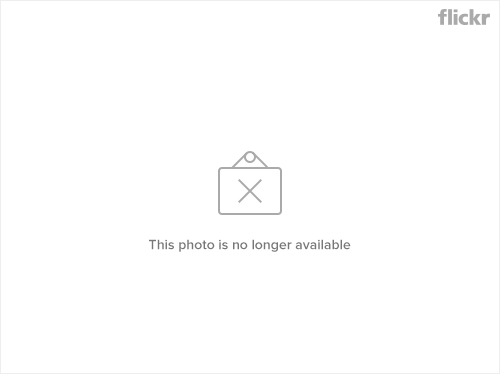

envelope (24.58%)


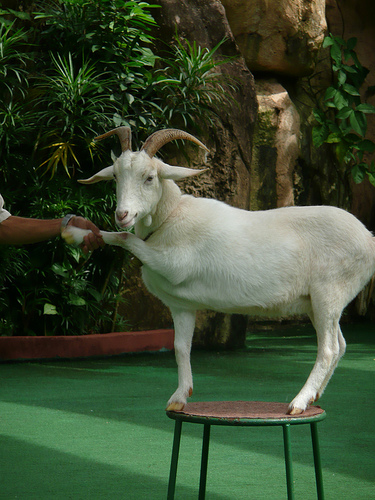

ram (71.74%)


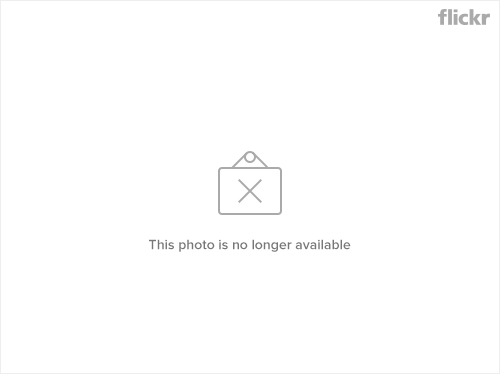

envelope (24.58%)


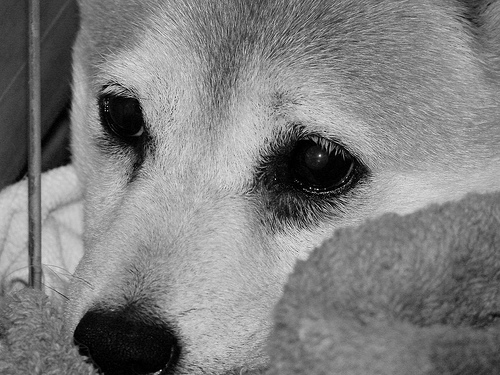

dalmatian (11.32%)


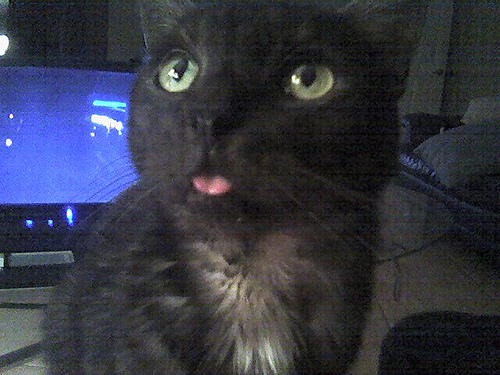

Persian_cat (70.38%)


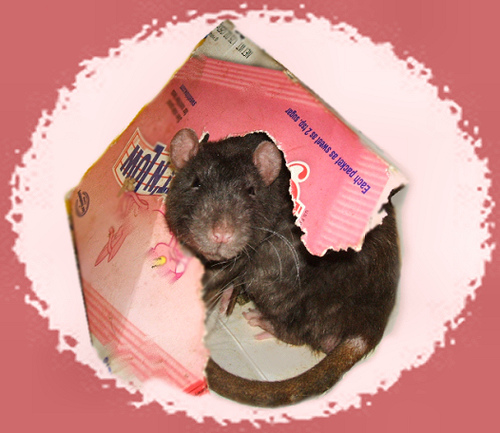

hamster (96.89%)


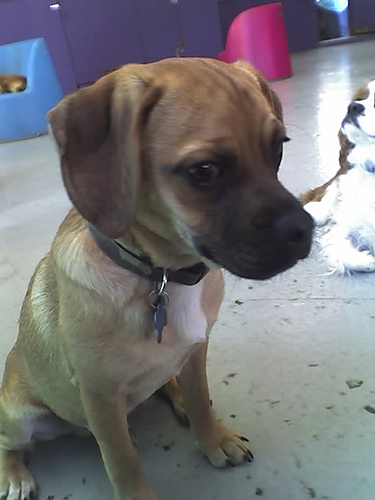

American_Staffordshire_terrier (37.92%)


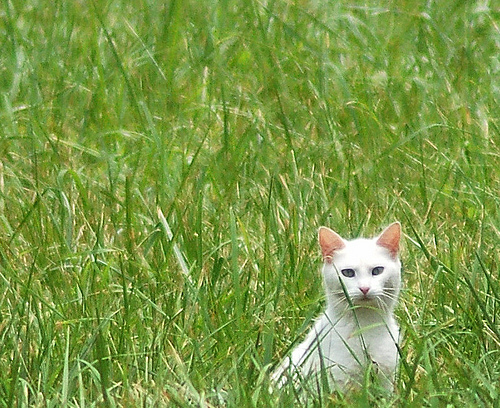

kit_fox (33.77%)


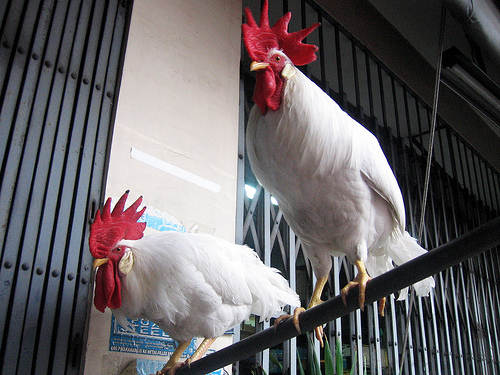

cock (79.80%)


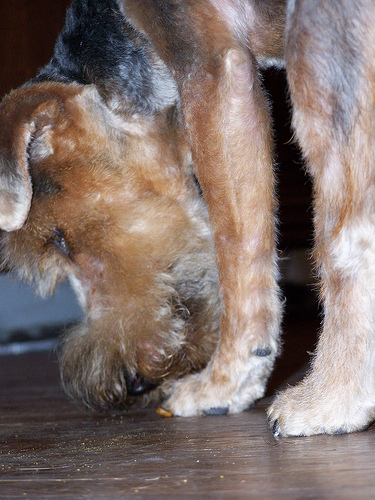

Airedale (62.22%)


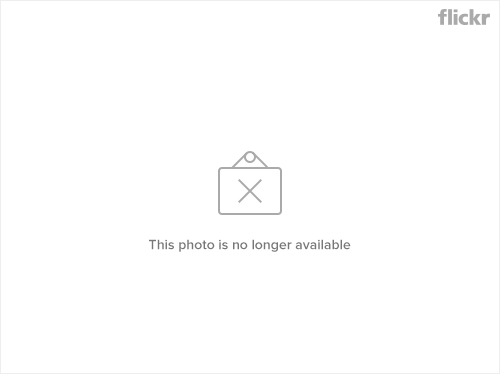

envelope (24.58%)


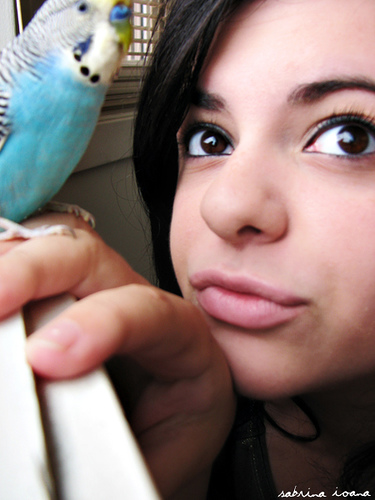

macaw (23.24%)


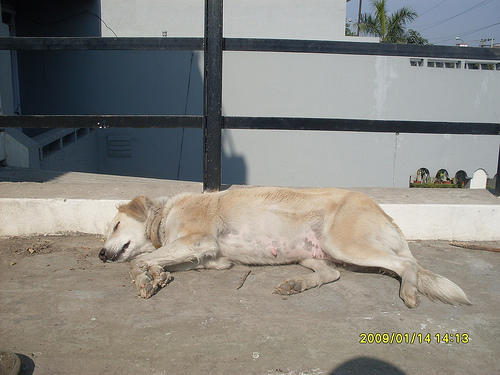

dingo (18.60%)


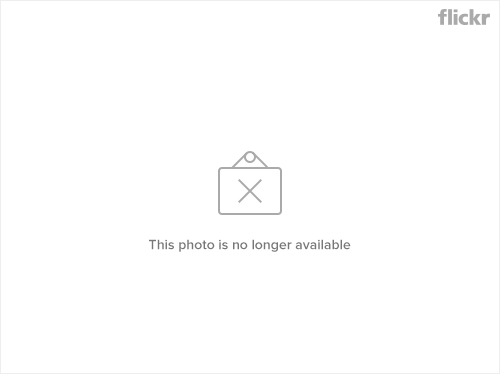

envelope (24.58%)


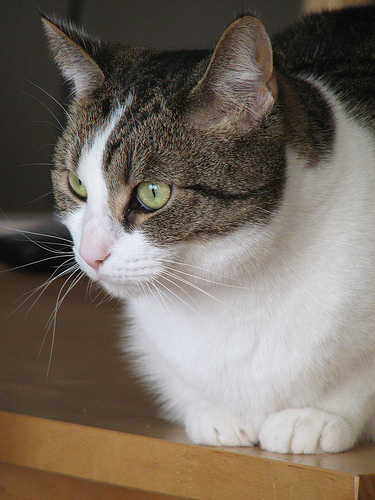

tabby (63.85%)


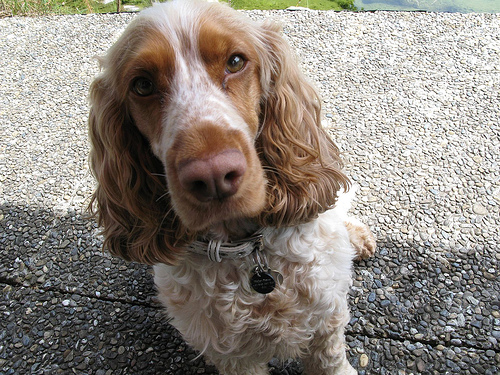

cocker_spaniel (58.69%)


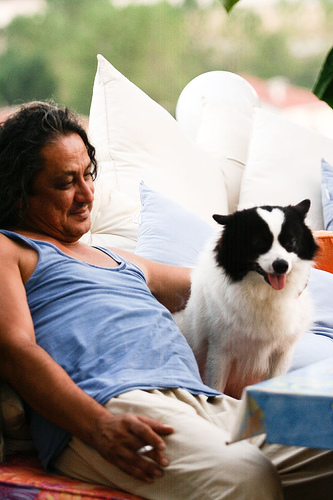

papillon (41.99%)


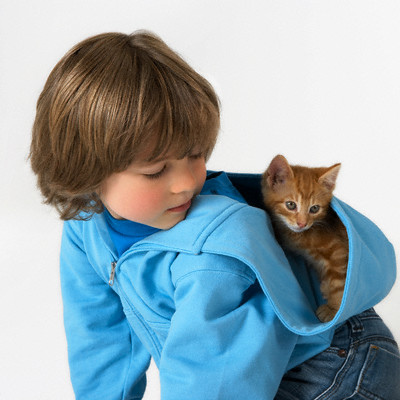

sweatshirt (9.49%)


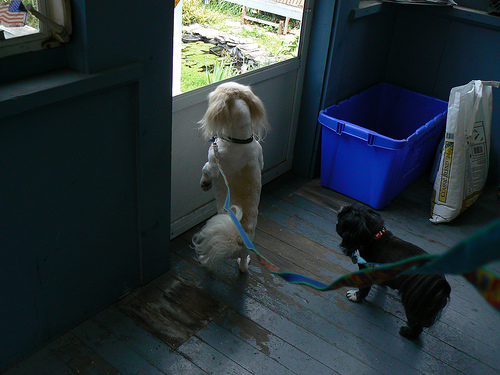

pay-phone (11.73%)


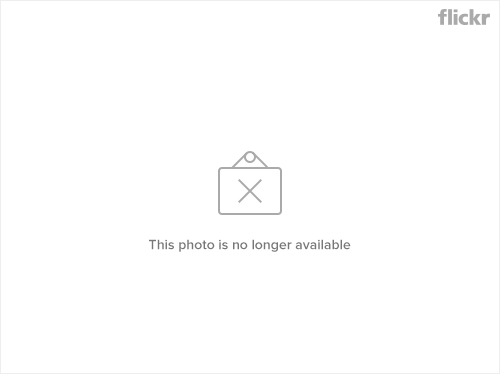

envelope (24.58%)


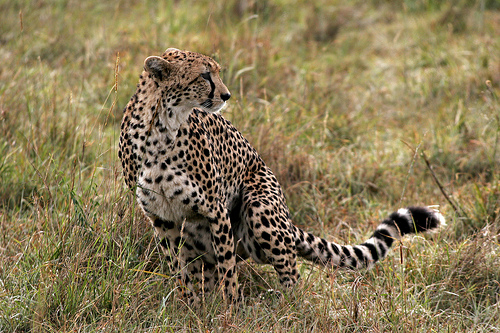

cheetah (99.73%)


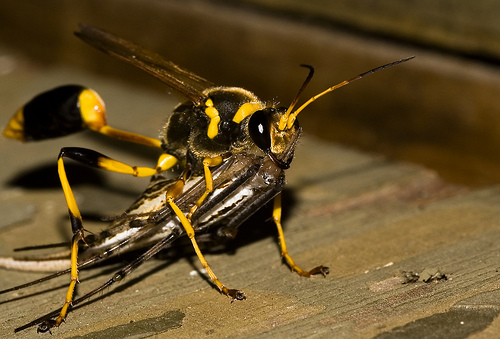

grasshopper (58.12%)


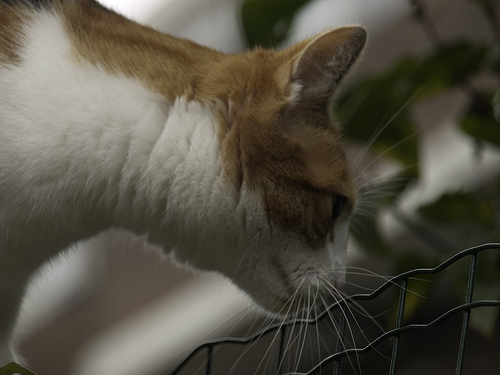

cougar (35.48%)


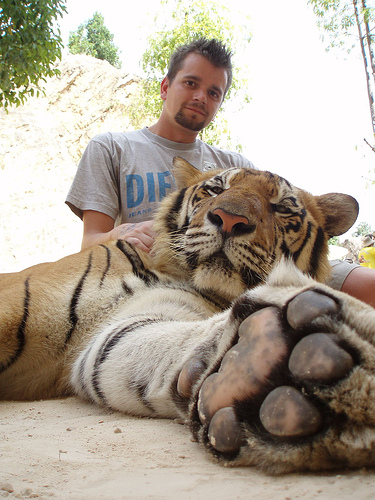

tiger (66.00%)


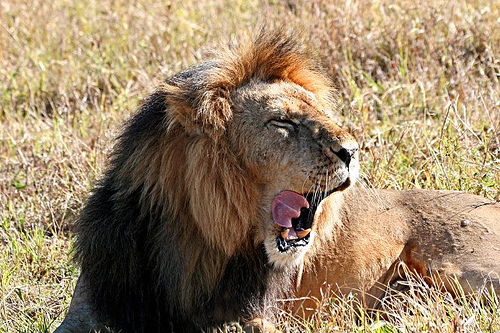

lion (99.90%)


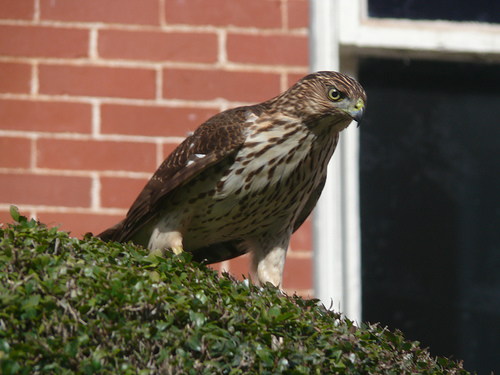

kite (35.70%)


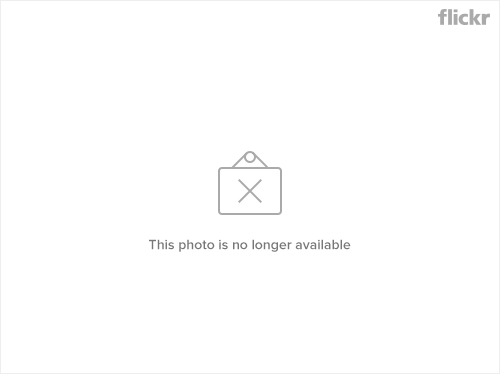

envelope (24.58%)


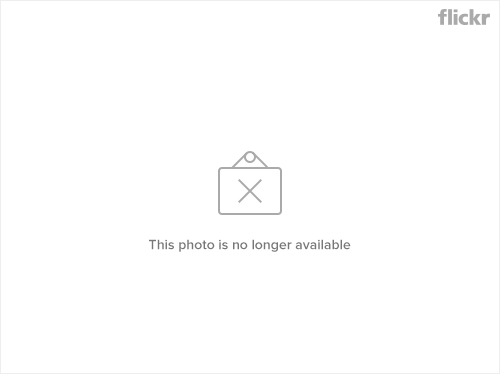

envelope (24.58%)


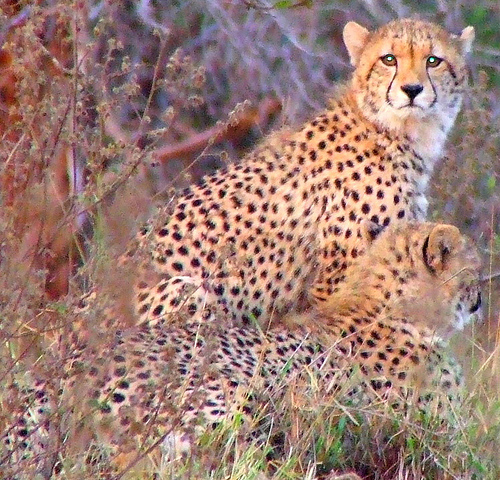

cheetah (99.90%)


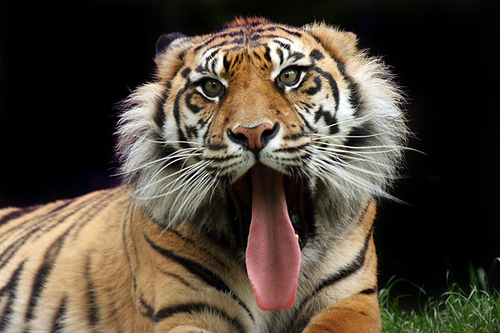

tiger (79.72%)


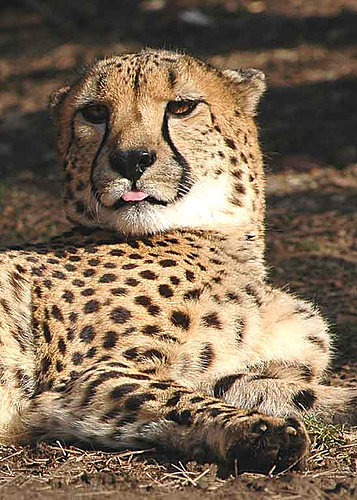

cheetah (99.94%)


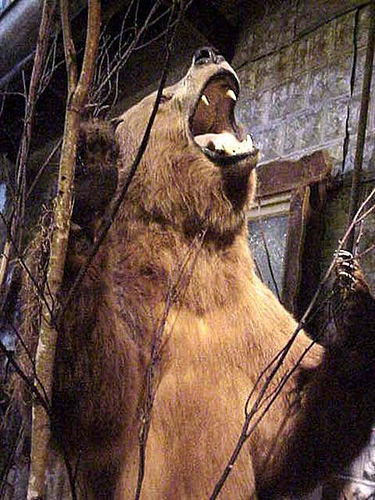

bighorn (66.09%)


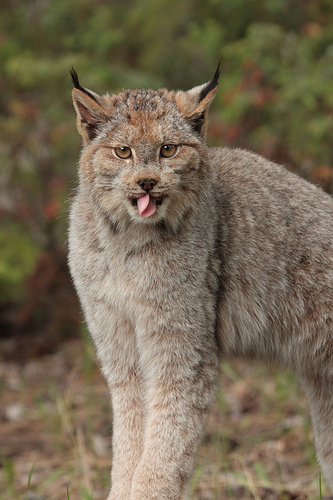

lynx (99.94%)


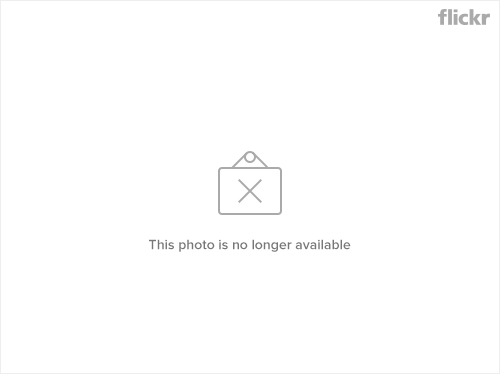

envelope (24.58%)


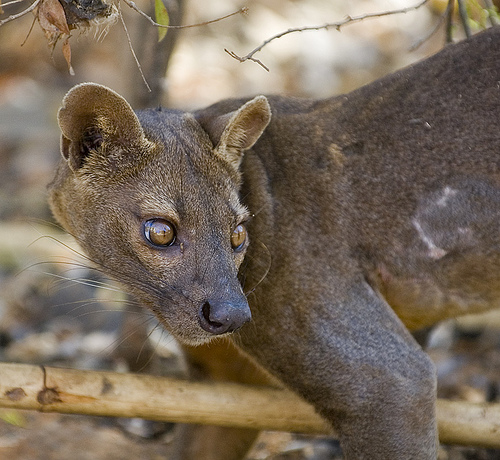

mongoose (84.28%)


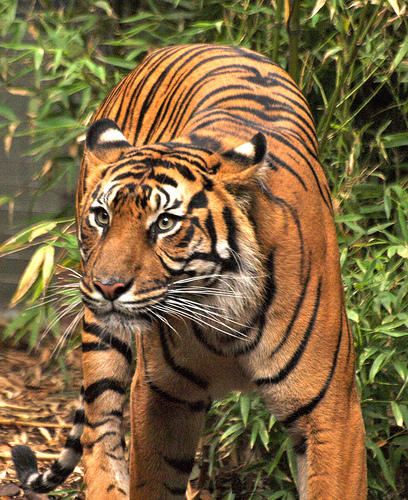

tiger (81.68%)


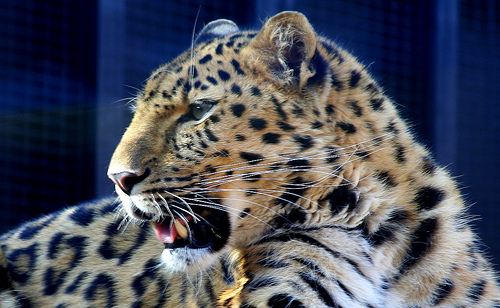

leopard (63.89%)


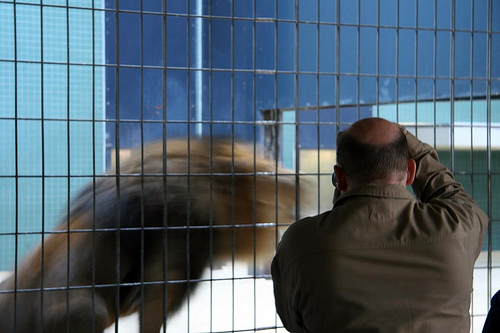

spider_monkey (35.65%)


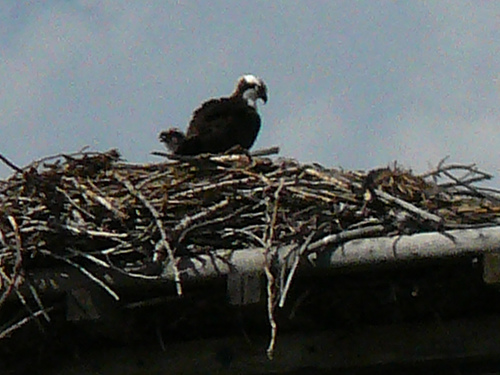

vulture (44.06%)


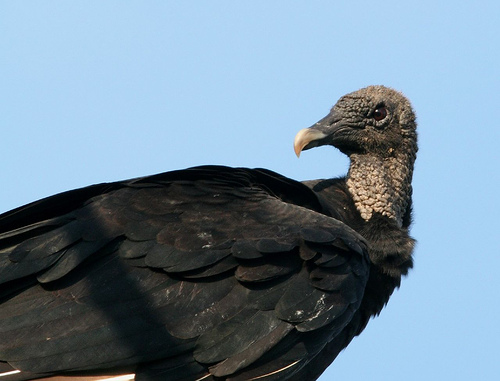

vulture (99.18%)


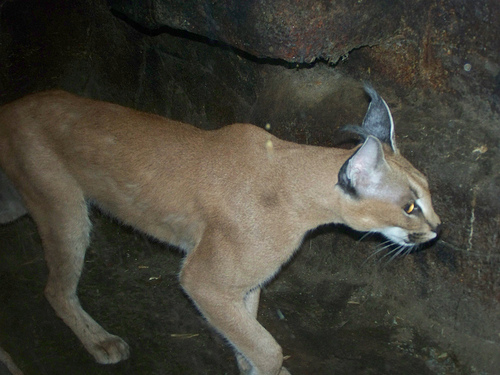

cougar (91.07%)


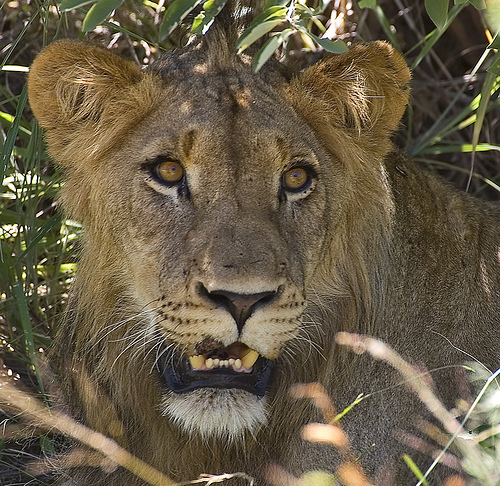

lion (98.69%)


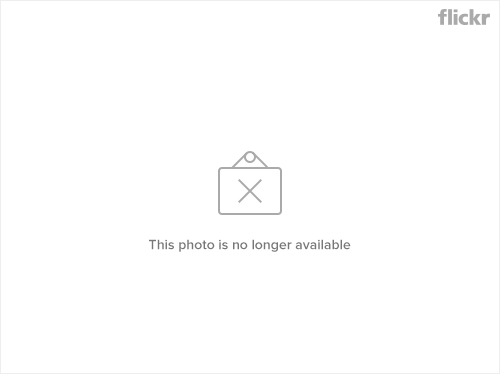

envelope (24.58%)


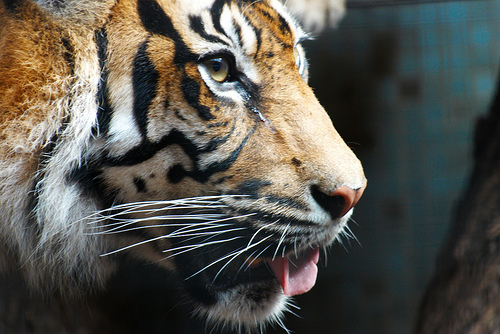

tiger (78.90%)


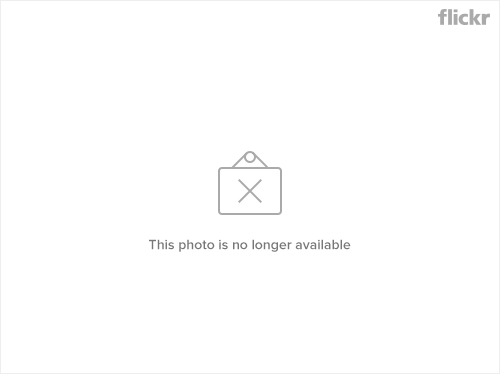

envelope (24.58%)


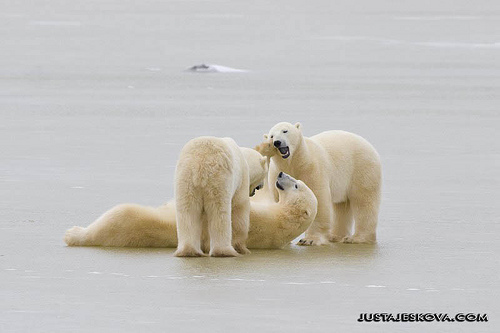

ice_bear (97.38%)


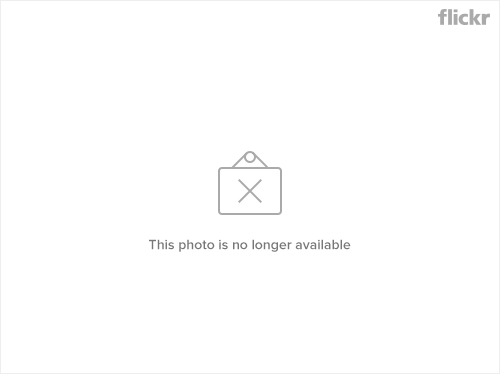

envelope (24.58%)


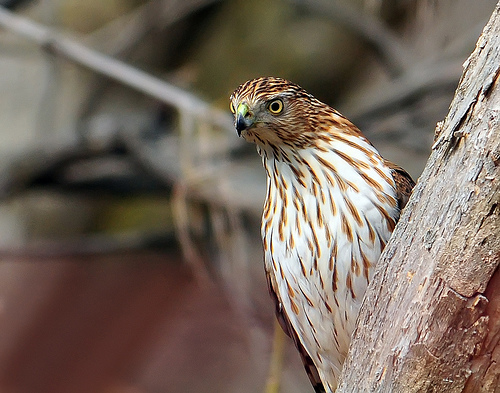

house_finch (89.87%)


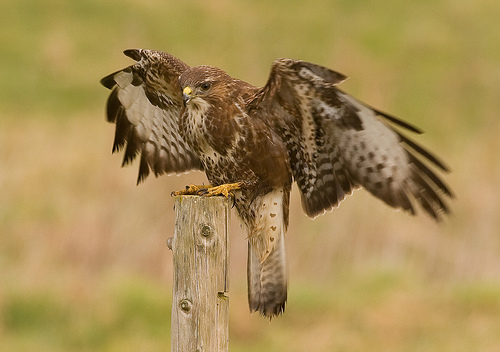

kite (46.13%)


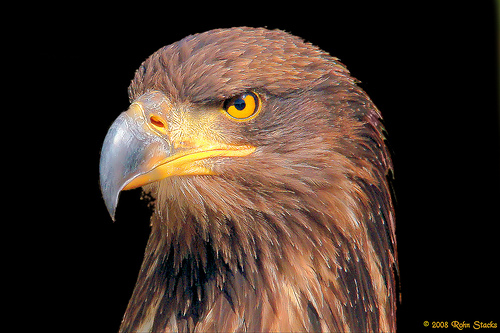

kite (98.33%)


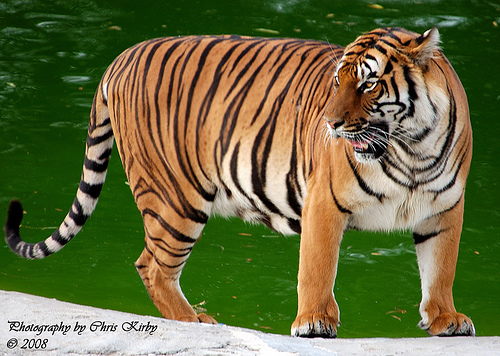

tiger (72.38%)


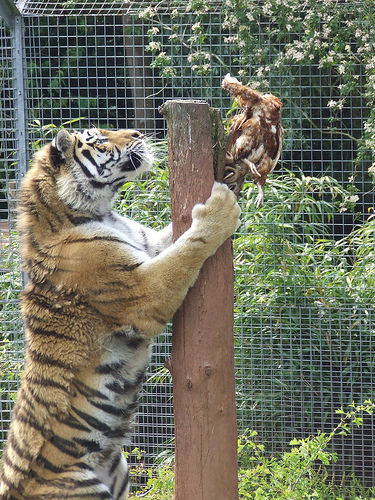

tiger (57.15%)


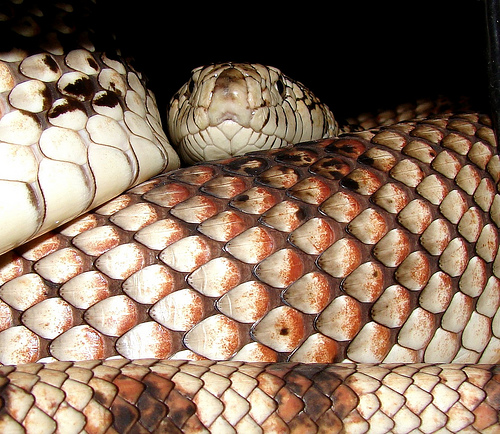

king_snake (57.13%)


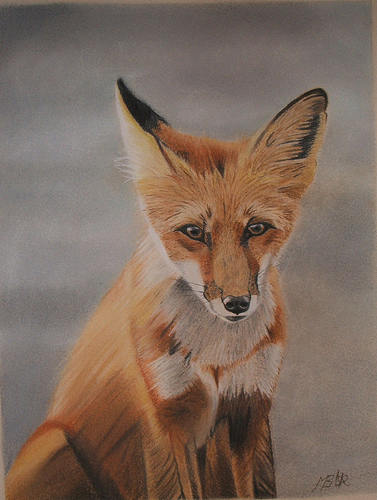

red_fox (70.72%)


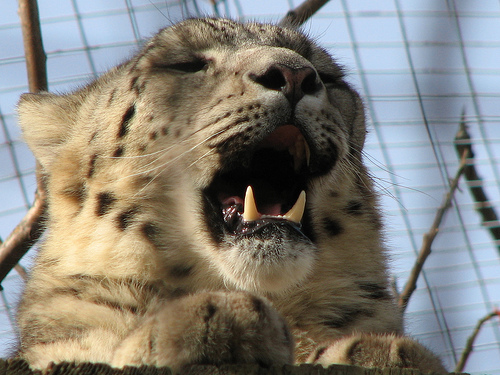

snow_leopard (95.86%)


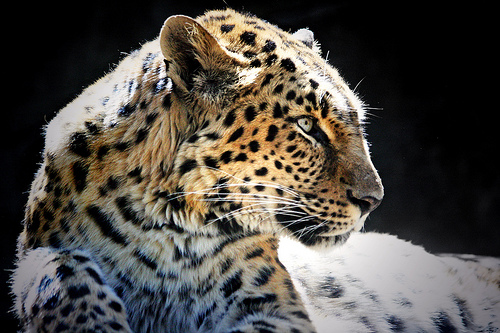

leopard (88.08%)


In [19]:
urls = ["http://www.comune.torino.it/pass/php/4/img/sport/equit.jpg",
"http://images.gadmin.ch/9677/images/ross.jpg",
"http://harasambato.files.wordpress.com/2008/03/ani-245.jpg",
"http://farm2.static.flickr.com/1163/1458785950_7b26ec7108.jpg",
"http://farm3.static.flickr.com/2329/2319113447_0a0a08df12.jpg",
"http://farm4.static.flickr.com/3543/3318172953_6419a73da2.jpg",
"http://farm3.static.flickr.com/2249/2234985244_e635cd1a28.jpg",
"http://farm4.static.flickr.com/3008/2743915446_635391fc8a.jpg",
"http://farm4.static.flickr.com/3208/2934406071_01081e64d0.jpg",
"http://farm4.static.flickr.com/3223/2754913859_f371eedec7.jpg",
"http://farm1.static.flickr.com/215/445192408_69e1493592.jpg",
"http://farm1.static.flickr.com/57/164213249_86a68a52be.jpg",
"http://farm1.static.flickr.com/171/437176079_947526e681.jpg",
"http://farm4.static.flickr.com/3241/2811187223_bfebb62fd1.jpg",
"http://farm4.static.flickr.com/3133/2745001378_7f60897f09.jpg",
"http://farm4.static.flickr.com/3195/2680634543_145d53b27b.jpg",
"http://farm1.static.flickr.com/62/185302661_e9553e5400.jpg",
"http://farm2.static.flickr.com/1426/846753061_13b7a6ab14.jpg",
"http://farm4.static.flickr.com/3360/3197022092_3fdc81d7f7.jpg",
"http://farm1.static.flickr.com/18/24030467_06cc512741.jpg",
"http://farm3.static.flickr.com/2020/2097889380_3b85f4e4bf.jpg",
"http://farm2.static.flickr.com/1266/706729218_04b5fde8b2.jpg",
"http://farm2.static.flickr.com/1397/960463626_5fed29e7c8.jpg",
"http://farm4.static.flickr.com/3046/2646119264_37dbb7e56d.jpg",
"http://farm2.static.flickr.com/1175/536128686_6006445ea9.jpg",
"http://farm4.static.flickr.com/3190/2867538561_e4cd88f76b.jpg",
"http://farm3.static.flickr.com/2287/2806543051_78c9e0019d.jpg",
"http://farm4.static.flickr.com/3432/3300005536_6fc92a6d52.jpg",
"http://farm4.static.flickr.com/3135/2961539936_31bdf0e051.jpg",
"http://farm3.static.flickr.com/2317/1922678136_2a21a2b6ff.jpg",
"http://farm1.static.flickr.com/66/160189728_9b7f659e4e.jpg",
"http://farm1.static.flickr.com/133/319744265_783e995789.jpg",
"http://farm4.static.flickr.com/3252/3071355541_cf77b2cb41.jpg",
"http://farm2.static.flickr.com/1226/1058136377_17ac78b553.jpg",
"http://farm2.static.flickr.com/1280/638033933_82ed3c67d7.jpg",
"http://farm4.static.flickr.com/3186/2554838357_02df5a7760.jpg",
"http://farm1.static.flickr.com/36/76693880_192f355975.jpg",
"http://farm1.static.flickr.com/4/5206754_8b2a06fc5a.jpg",
"http://farm4.static.flickr.com/3115/2589129924_cbca8cda99.jpg",
"http://farm2.static.flickr.com/1090/526713516_3e1a8e771d.jpg",
"http://farm1.static.flickr.com/225/483530773_79fd29fdf9.jpg",
"http://farm4.static.flickr.com/3287/3423999960_b23f468f9e.jpg",
"http://farm3.static.flickr.com/2194/2378411354_f8bb2dd4c8.jpg",
"http://farm4.static.flickr.com/3041/2921213417_a37cb52d5d.jpg",
"http://farm1.static.flickr.com/187/477636650_18bdb3262f.jpg",
"http://farm1.static.flickr.com/72/195833143_085edf6542.jpg",
"http://farm4.static.flickr.com/3367/3426976381_bb98f9c713.jpg",
"http://farm3.static.flickr.com/2123/2371903628_7723aa82ce.jpg",
"http://farm1.static.flickr.com/33/59354120_198292b48e.jpg",
"http://farm2.static.flickr.com/1392/745182395_6b6c149e13.jpg",
"http://farm4.static.flickr.com/3163/3045786918_b28430fac6.jpg",
"http://farm4.static.flickr.com/3232/3029327130_c734a99bc1.jpg",
"http://farm3.static.flickr.com/2279/2202019879_298665b655.jpg",
"http://farm3.static.flickr.com/2016/2275371680_2db108bf49.jpg",
"http://farm4.static.flickr.com/3358/3296419033_cd2c198333.jpg",
"http://farm1.static.flickr.com/172/377712783_ed497ebd49.jpg",
"http://farm4.static.flickr.com/3228/2874440588_1f35b70925.jpg",
"http://farm1.static.flickr.com/54/183198118_865c71bd2f.jpg",
"http://farm4.static.flickr.com/3060/2313839620_7b28711a84.jpg",
"http://farm1.static.flickr.com/41/86162820_4d94365295.jpg",
"http://farm1.static.flickr.com/123/423824544_7f2ce7bfd9.jpg",
"http://farm4.static.flickr.com/3067/2408409305_cef1fbf85e.jpg"]


for url in urls:
    image_file = download_image(url)
    if image_file:
        predict_image(image_file, model, vgg16_preprocess_input,  vgg16_decode_predictions, show_chart=False)